In [1]:
from math import sqrt,pi
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvnorm
import matplotlib.pyplot as plt

%matplotlib inline

# Q3

In [2]:
def grid_gen(xlim,ylim,step):
    return np.mgrid[-xlim:xlim:step, -ylim:ylim:step]                         

In [3]:
def f_eval(grid,mu,cov):
    pos = np.dstack((grid[0],grid[1]))
    return mvnorm.pdf(pos,mu,cov)

In [4]:
def contour(prob,mu=None,cov=None,xlim=None,ylim=None,step=None,f=None,grid=None,flag=True):
    
    if flag==True:
        grid = grid_gen(xlim,ylim,step)
        z = f_eval(grid,mu,cov)
        
    else:
        z=f
        
    fig = plt.figure(figsize=(10,10))
    cs = plt.contour(grid[0],grid[1],z)
    plt.clabel(cs,inline_spacing=5, fontsize=7)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour plot for {}'.format(prob))
#     plt.savefig('{}_plot.png'.format(prob), dpi=300)

### 3.1

In [149]:
mu1 = np.array([1,1])

In [150]:
cov1 = np.array([[1, 0],[0, 2]]) 

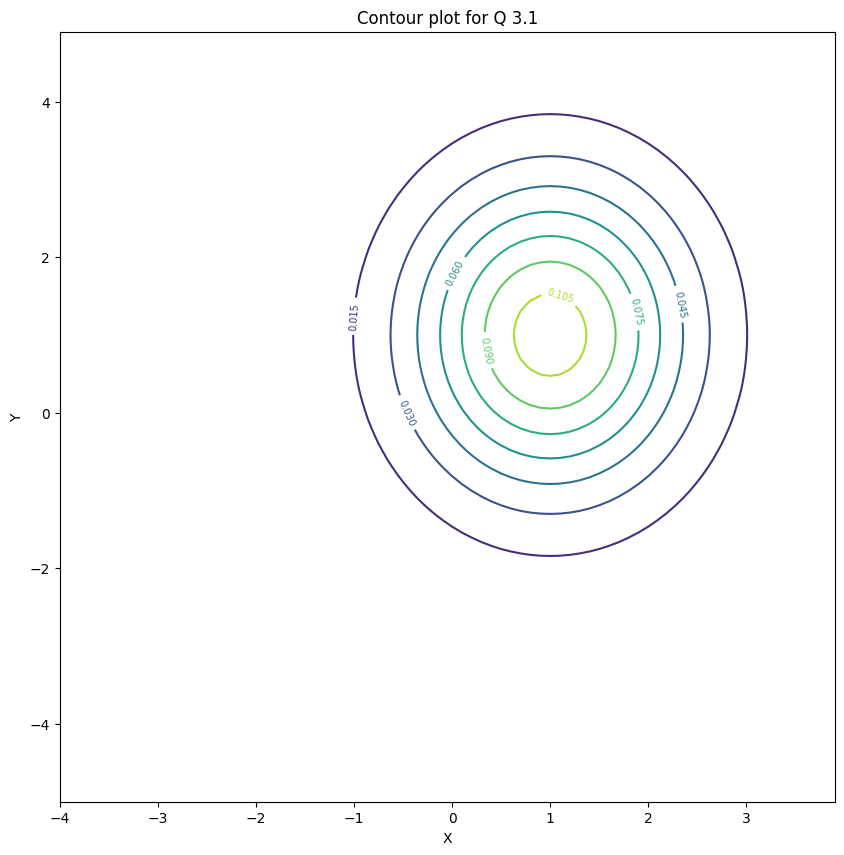

In [151]:
contour('Q 3.1',mu1,cov1,4,5,0.1)

### 3.2

In [152]:
mu2 = np.array([-1,2])
cov2 = np.array([[2, 1],[1, 4]]) 

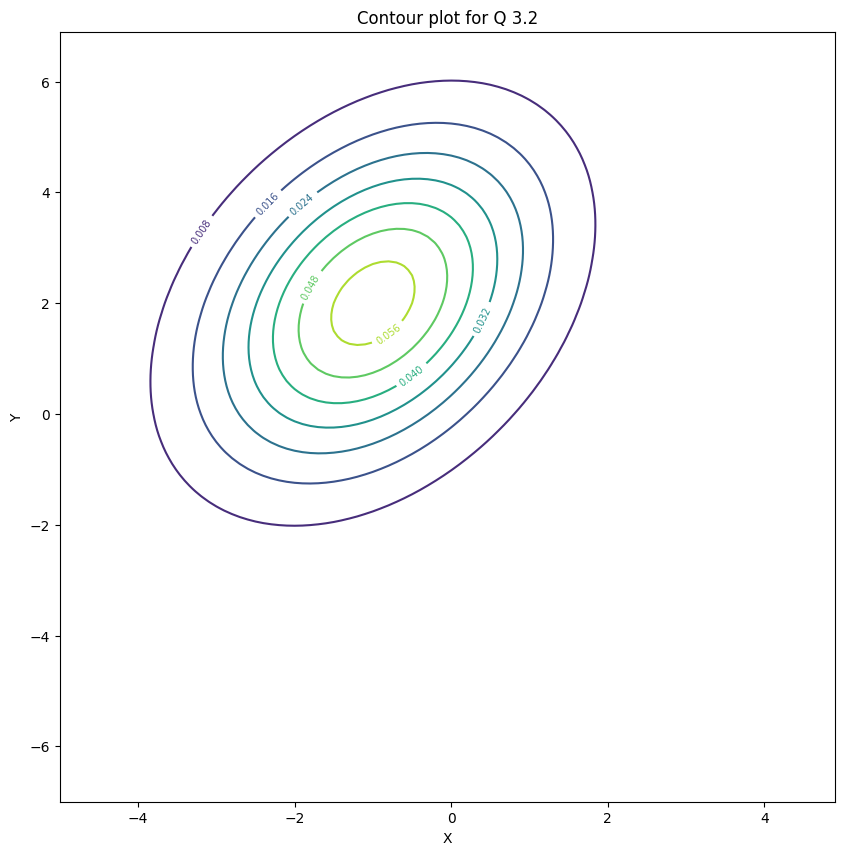

In [153]:
contour('Q 3.2',mu2,cov2,5,7,0.1)

### 3.3

In [154]:
mu1 = np.array([0,2])
mu2 = np.array([2,0])
cov = np.array([[2, 1],[1, 1]]) 

In [155]:
mgrid = grid_gen(6,5,0.1)

In [156]:
z = f_eval(mgrid,mu1,cov)-f_eval(mgrid,mu2,cov)

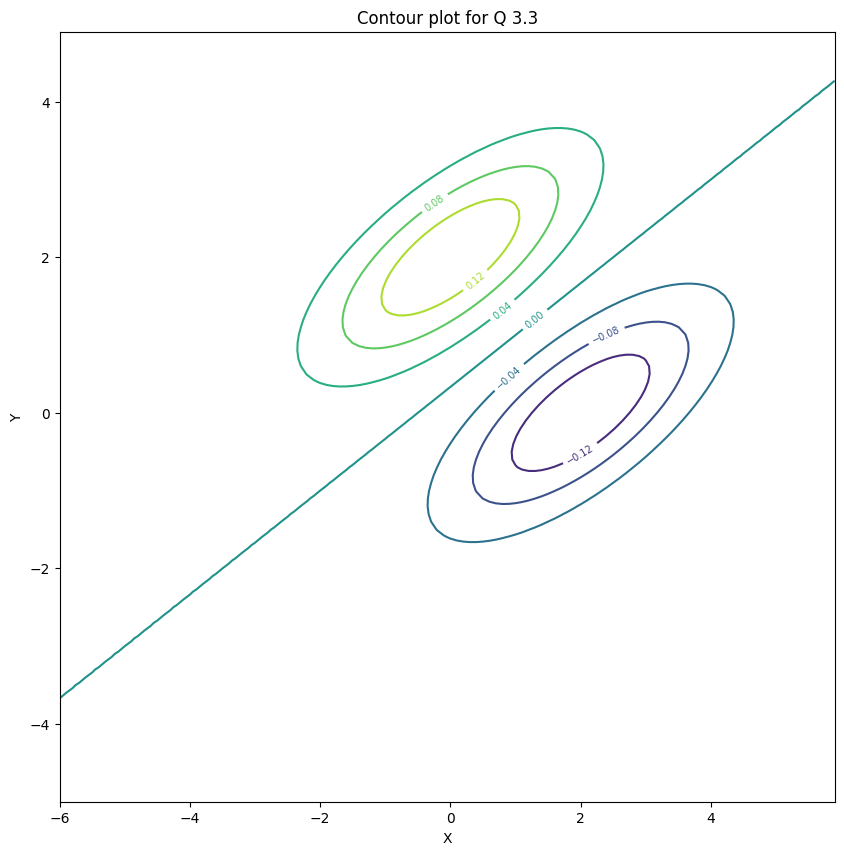

In [157]:
contour('Q 3.3',f=z,grid=mgrid,flag=False)

### 3.4

In [183]:
mu1 = np.array([0,2])
mu2 = np.array([2,0])
cov1 = np.array([[2, 1],[1, 1]]) 
cov2 = np.array([[2, 1],[1, 4]]) 

In [181]:
mgrid = grid_gen(6,6,0.01)
z = f_eval(mgrid,mu1,cov1)-f_eval(mgrid,mu2,cov2)

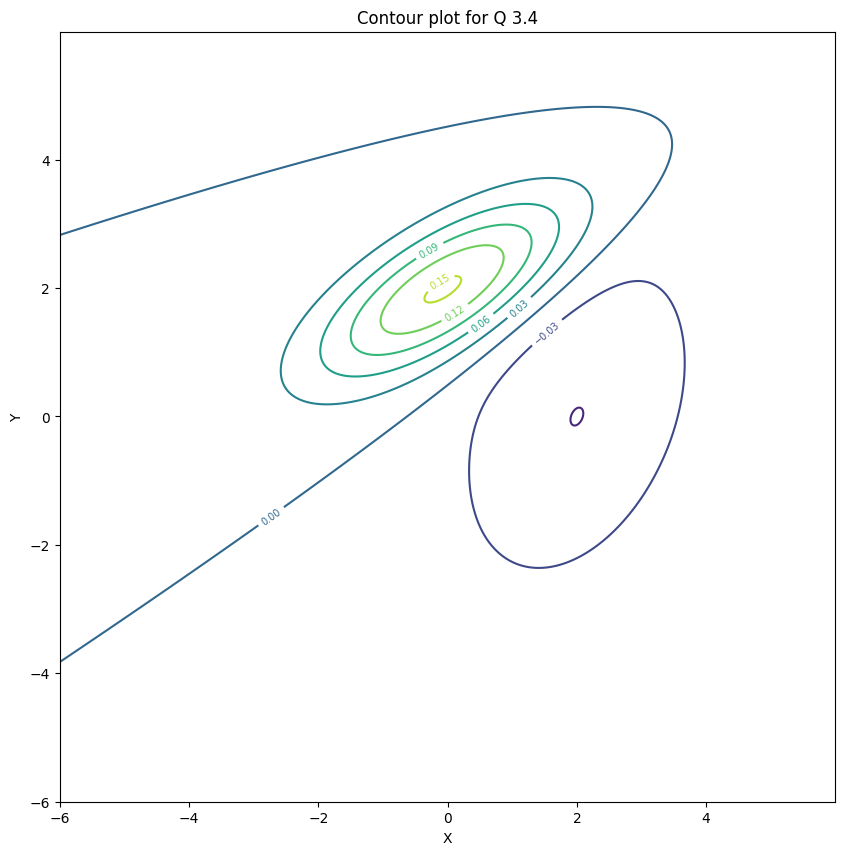

In [182]:
contour('Q 3.4',f=z,grid=mgrid,flag=False)

Zoom in to get the value for the one unlabeled contour

In [192]:
mgrid = grid_gen(3,3,0.01)
z = f_eval(mgrid,mu1,cov1)-f_eval(mgrid,mu2,cov2)

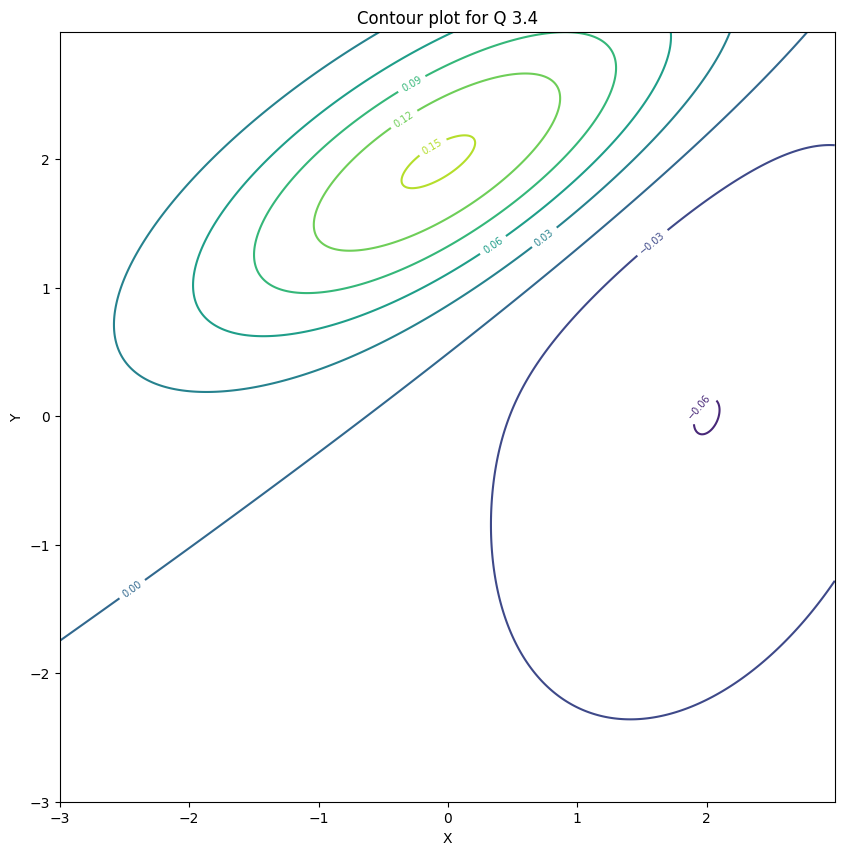

In [194]:
fig = plt.figure(figsize=(10,10))
cs = plt.contour(mgrid[0],mgrid[1],z)
plt.clabel(cs,inline_spacing=5, fontsize=7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour plot for Q 3.4')
# plt.savefig('Q 3.4_plot_zoom.png', dpi=300)

### 3.5

In [161]:
mu1 = np.array([1,1])
mu2 = np.array([-1,-1])
cov1 = np.array([[2, 0],[0, 1]]) 
cov2 = np.array([[2, 1],[1, 2]]) 

In [162]:
mgrid = grid_gen(10,15,0.05)
z = f_eval(mgrid,mu1,cov1)-f_eval(mgrid,mu2,cov2)

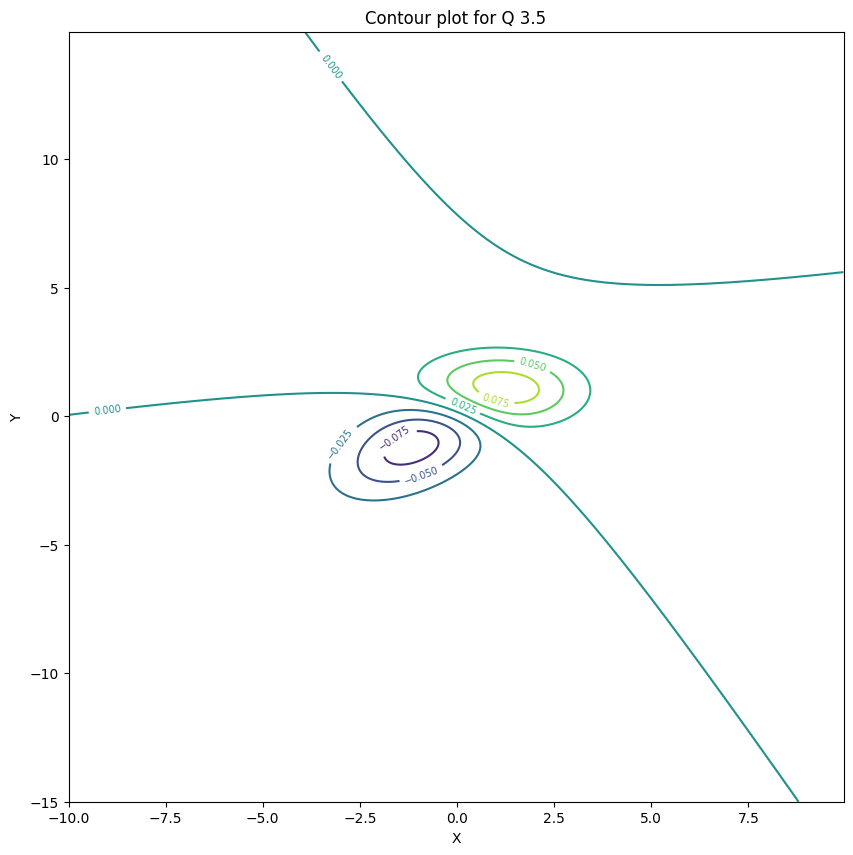

In [163]:
contour('Q 3.5',f=z,grid=mgrid,flag=False)

# Q4

In [5]:
class tupl(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def __add__(self, other):
        return tupl(self.x+other.x,self.y+other.y)  
    
    def __sub__(self, other):
        return tupl(self.x - other.x, self.y - other.y)
    
    def __rmul__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return tupl(other*self.x, other*self.y)
    
    def __repr__(self):
        return f"({self.x},{self.y})"

In [6]:
np.random.seed(42)

### 4.1

In [7]:
points = []

for i in range(100):
    x1=np.random.normal(3,3)
    points+=[tupl(x1 ,0.5*x1+np.random.normal(4,2))]

In [8]:
temp_sum=tupl(0,0)

for point in points:
    temp_sum+=point

points_mean = (1/len(points))*temp_sum

In [9]:
print('The mean in R2 is: ', points_mean)

The mean in R2 is:  (2.6533072356348306,5.394698266705852)


### 4.2

In [10]:
x1=[]
x2=[]

for point in points:
    x1+=[point.x]
    x2+=[point.y]
    
temp_matrix = np.array([x1,x2])

In [11]:
sigma = np.cov(temp_matrix)

In [12]:
print("The covariance matrix based off the samples is: \n\n ", sigma)

The covariance matrix based off the samples is: 

  [[6.59945084 3.46560266]
 [3.46560266 5.80661362]]


### 4.3

In [633]:
eig_vals, eig_vecs = np.linalg.eig(sigma)

In [634]:
eig_vecs

array([[ 0.74620559, -0.66571557],
       [ 0.66571557,  0.74620559]])

In [638]:
eig_vals

array([9.6912337 , 2.71483076])

### 4.4 

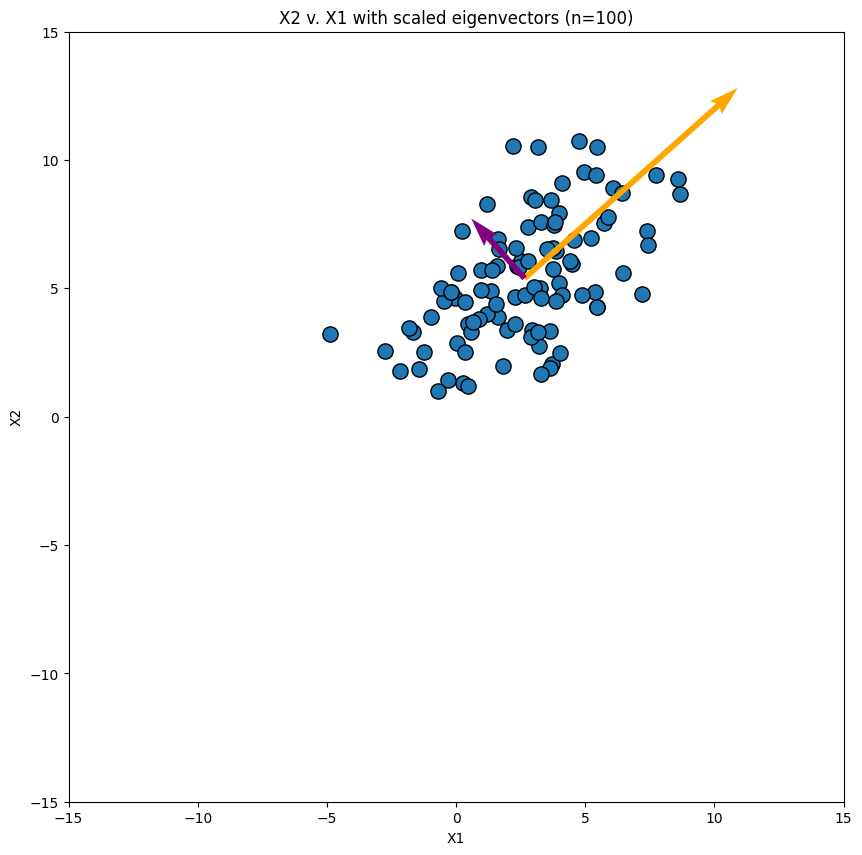

In [694]:
plt.figure(figsize=(10,10))
xlim = [-15,15]
ylim = [-15,15]

plt.scatter(x1,x2,s=120, edgecolor='k')
plt.quiver(points_mean.x,points_mean.y, eig_vecs[0][0],eig_vecs[1][0],color='orange',scale=eig_vals[1])
plt.quiver(points_mean.x,points_mean.y, eig_vecs[0][1],eig_vecs[1][1],color='purple',scale=eig_vals[0])
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('X2 v. X1 with scaled eigenvectors (n=100)')
# plt.savefig('Q4.4_plot.png', dpi=300)

### 4.5

In [659]:
x_temp=[]

for point in points:
    
    x_temp+=[point-points_mean]

In [685]:
x_rot_x =[]
x_rot_y =[]

for i in range(len(x_temp)):
    x_rot_x+=[np.matmul(eig_vecs.T,np.array([x_temp[i].x,x_temp[i].y]))[0]]
    x_rot_y+=[np.matmul(eig_vecs.T,np.array([x_temp[i].x,x_temp[i].y]))[1]]

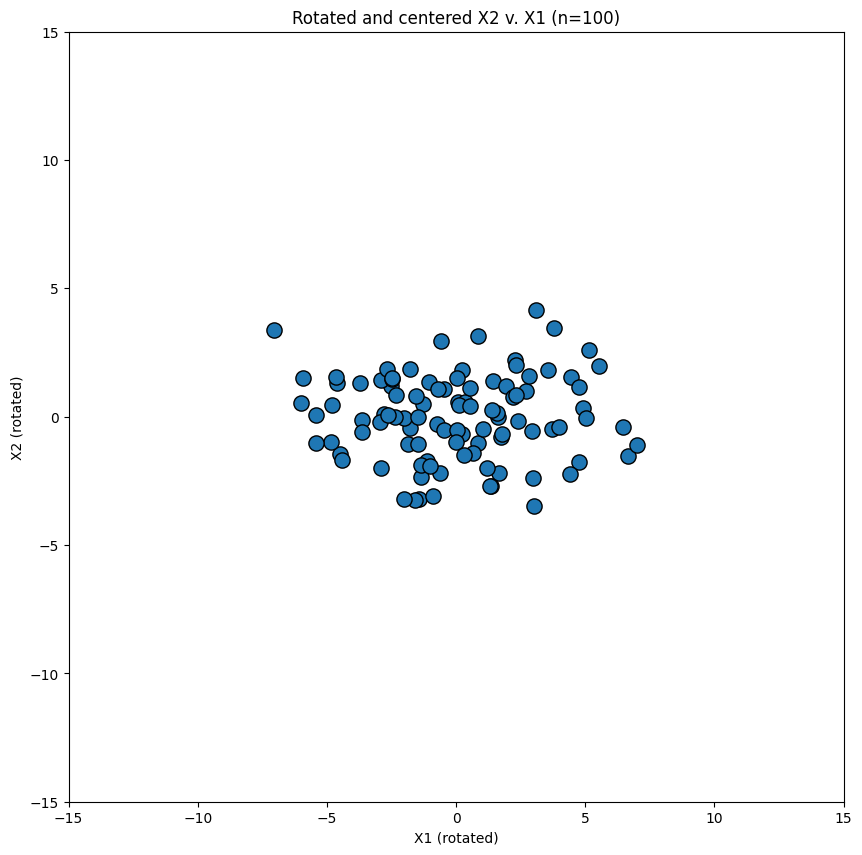

In [695]:
plt.figure(figsize=(10,10))
xlim = [-15,15]
ylim = [-15,15]

plt.scatter(x_rot_x,x_rot_y,s=120, edgecolor='k')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('X1 (rotated)')
plt.ylabel('X2 (rotated)')
plt.title('Rotated and centered X2 v. X1 (n=100)')
# plt.savefig('Q4.5_plot.png', dpi=300)

# Q8

### 8.1

In [144]:
mnist = np.load('data/mnist-data-hw3.npz')

In [145]:
mnist.files

['training_data', 'training_labels', 'test_data']

In [146]:
mnist['training_data'].shape

(60000, 1, 28, 28)

In [287]:
#Need to reshape the data to have the images be row vectors
mnist_data=mnist['training_data'].reshape(60000,784)

In [148]:
# contrast-normalize by the 2-norm of the pixels
for i in range(mnist_data.shape[0]):

    mnist_data[i] = 1/(np.linalg.norm(mnist_data[i])) * mnist_data[i]

In [299]:
#'data' needs to be an array with sample rows and column features 
def fit_gaussians(data, labels):
    
    #Initialize dictionaries to hold the mean vectors and the covariance matrices for the different number classes
    mus = {}
    covs = {}

    #Step through each class
    for i in range(10):

        #create a temporary array with just the samples for class i; each sample is a row vector of pixels
        temp = data[labels==i,:]

        #get the sample covariance matrix for class i
        covs[i] = np.cov(temp, rowvar=False)

        #Initialize a list for the class's mean vector
        means = []

        #step through each column/feature, take its mean and add it to the list; the final list is the mean vector for the class
        for j in range(temp.shape[1]):
            means += [temp[:,j].mean()]

        #Add the class mean vector to the dictionary for the class means 
        mus[i] = means
        
    return mus, covs

In [301]:
mus, covs = fit_gaussians(mnist_data,mnist['training_labels'])

## 8.2

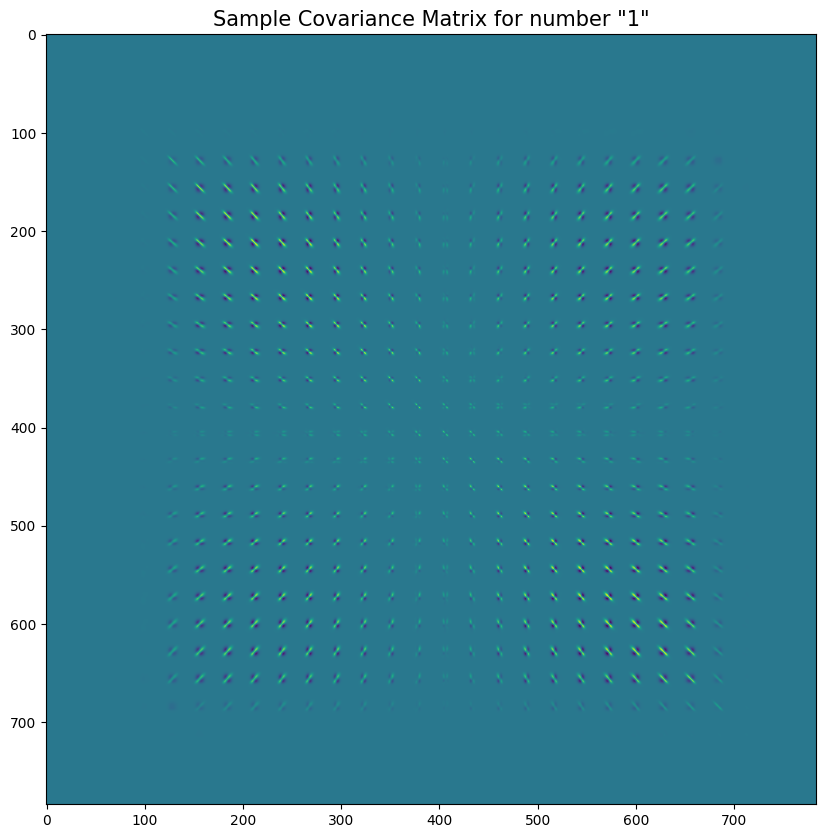

In [303]:
plt.figure(figsize=(10,10))
plt.imshow(covs[1])
plt.title('Sample Covariance Matrix for number "1"', fontsize=15)
# plt.savefig('Q8.2_plot.png', dpi=300)

## 8.3

#### (a)

In [162]:
from sklearn.model_selection import train_test_split
from math import log,e
import random

In [452]:
def get_arrays(data,labels):
    
    # get the class means and the class covariance matrices
    mus, covs = fit_gaussians(data,labels)
    
    #Make a list of class priors calculate by dividing the number of class instances in the labels by the # of samples
    priors = []
    for i in range(10):
        
        priors += [sum(labels==i)/len(labels)]
    
    return mus, covs, priors

In [459]:
def get_pooled_inv(covs,labels): 
    
    #calculate the class-pooled covariance matrix 
    temp_matrix = np.zeros(covs[1].shape,dtype=float)
    for i in covs.keys():
        temp_matrix += covs[i]
    
    pooled_cov = 1/len(labels)*temp_matrix 
    
    #Diagonally load pooled_cov to make it pd
    approx_cov = (1/len(labels)**4)*np.identity(covs[1].shape[0]) + pooled_cov
    
    #Get the inverse pooled pd covariance matrix
    inv_cov = np.linalg.inv(approx_cov)
    
    return inv_cov

In [460]:
def lda_model(training_data, training_labels, validation):
    
    mus, covs, priors = get_arrays(training_data, training_labels)
    
    inv_cov = get_pooled_inv(covs,training_labels)
    
    preds = []
    
    for i in range(validation.shape[0]):
        
        class_scores = []
    
        for j in range(len(priors)):

            proj = np.matmul(np.array(mus[j]),inv_cov)

            class_scores += [np.matmul(proj,validation[i])-0.5*np.matmul(proj,mus[j]) + log(priors[j])]
            
        preds+=[class_scores.index(max(class_scores))]
                
    return preds

In [548]:
def get_error(predictions, labels):
    score = 0
    
    dig_scores = dict.fromkeys(np.linspace(0,9,10,dtype=int),0)
    
    for i in range(len(predictions)):
        if predictions[i] == labels[i]:
            score+=1
            dig_scores[labels[i]]+=1
     
    dig_errors = {}
    for key in dig_scores.keys():
        
        dig_errors[key] = 1-dig_scores[key]/sum(labels==key)
    
    return (1 - (score/len(predictions))), dig_errors

In [379]:
m_train, m_val, ml_train, ml_val = train_test_split(mnist_data, 
                                                      mnist['training_labels'], test_size=1/6, random_state=42)

In [461]:
test = lda_model(m_train[:100],ml_train[:100], m_val)

In [416]:
training_n = [100,200,500,1000,2000,5000,10000,30000,50000]

In [549]:
# reset the random seed
random.seed(42)

# train on the different training set sizes
errors = []
dig_errors = []

for n in training_n:
    rlist=random.sample(range(0, len(m_train)), n)
    
    temp_train = m_train[rlist]
    temp_labels = ml_train[rlist]
    
    preds = lda_model(temp_train, temp_labels, m_val)
    
    model_error, dig_error = get_error(preds, ml_val)
    
    errors +=[model_error]
    dig_errors +=[dig_error]

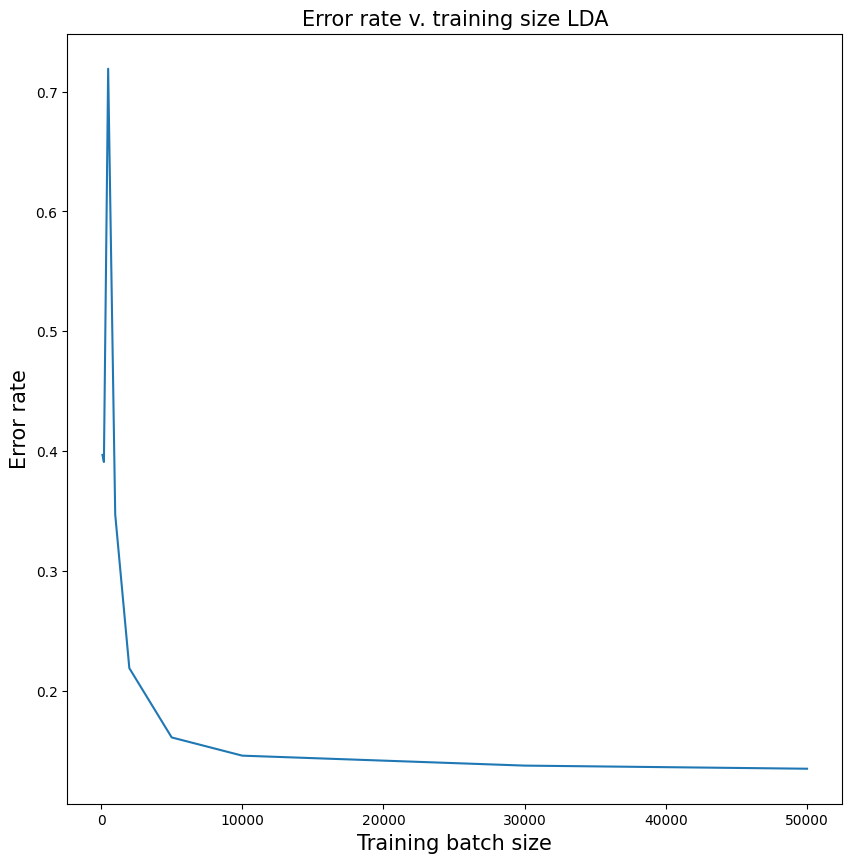

In [550]:
plt.figure(figsize=(10,10))
plt.plot(training_n, errors)
plt.title('Error rate v. training size LDA', fontsize=15)
plt.xlabel('Training batch size', fontsize=15)
plt.ylabel('Error rate', fontsize=15)
# plt.savefig('Q8.3_plot.png', dpi=300)

#### (b) 

In [512]:
def diag_loading(covs,labels):
    
    #initialize libraries for the 'kludged' covariance matrices and their inverses for the different classes
    k_covs={}
    inv_k_covs={}
    
    for i in range(len(covs)):
        
        approx_cov = (1e-3*np.linalg.eig(covs[i])[0][0])*np.identity(covs[1].shape[0]) + covs[i]
        
        k_covs[i] = approx_cov
        
        inv_k_covs[i] = np.linalg.inv(approx_cov)
        
    return k_covs, inv_k_covs        

In [496]:
def qda_model(data,labels,validation):
    
    mus, covs, priors = get_arrays(data, labels)
    
    covs, inv_covs = diag_loading(covs, labels)
    
    # Make a dictionary of the logs of the determinants of the covariance matrices so the calculations are done once
    dets = {}
    for i in range(len(covs)):
        dets[i] = np.linalg.slogdet(covs[i])
    
    preds = []
    
    for i in range(validation.shape[0]):
        
        class_scores = []
    
        for j in range(len(priors)):

            diff = validation[i] - mus[j]

            class_scores += [-0.5*np.matmul(np.matmul(diff,inv_covs[j]),diff) -0.5*dets[j][1] + log(priors[j])]
            
        preds+=[class_scores.index(max(class_scores))]
                
    return preds

In [572]:
# reset the random seed
random.seed(42)

# train on the different training set sizes
qda_errors = []
qda_dig_errors = []

for n in training_n:
    rlist=random.sample(range(0, len(m_train)), n)
    
    temp_train = m_train[rlist]
    temp_labels = ml_train[rlist]
    
    preds = qda_model(temp_train, temp_labels, m_val)
    
    model_error, dig_error = get_error(preds, ml_val)
    
    qda_errors +=[model_error]
    qda_dig_errors +=[dig_error]

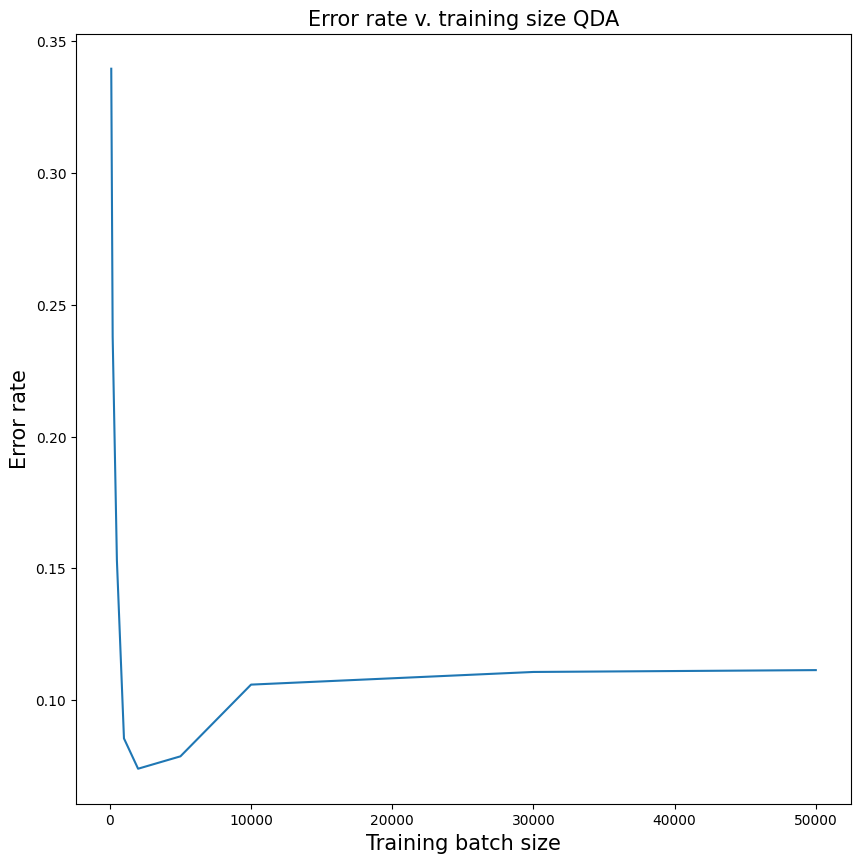

In [514]:
plt.figure(figsize=(10,10))
plt.plot(training_n, qda_errors)
plt.title('Error rate v. training size QDA', fontsize=15)
plt.xlabel('Training batch size', fontsize=15)
plt.ylabel('Error rate', fontsize=15)
# plt.savefig('Q8.3b_plot.png', dpi=300)

#### (d)

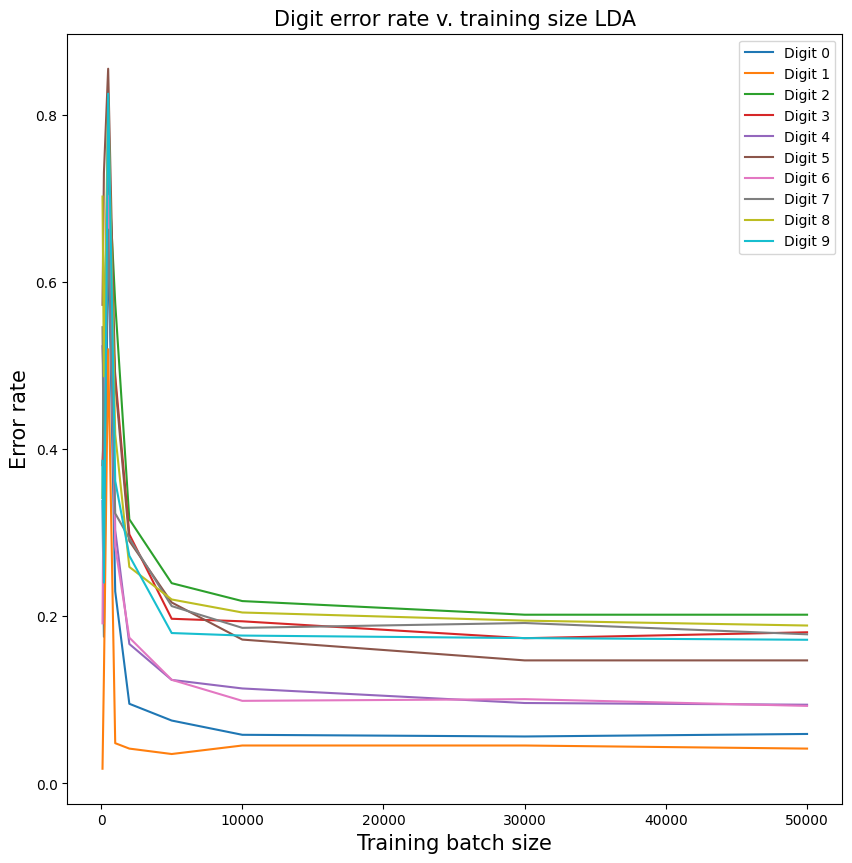

In [571]:
plt.figure(figsize=(10,10))
plt.plot(training_n, [dig_errors[i][0] for i in range(len(dig_errors))], label='Digit 0')
plt.plot(training_n, [dig_errors[i][1] for i in range(len(dig_errors))], label='Digit 1')
plt.plot(training_n, [dig_errors[i][2] for i in range(len(dig_errors))], label='Digit 2')
plt.plot(training_n, [dig_errors[i][3] for i in range(len(dig_errors))], label='Digit 3')
plt.plot(training_n, [dig_errors[i][4] for i in range(len(dig_errors))], label='Digit 4')
plt.plot(training_n, [dig_errors[i][5] for i in range(len(dig_errors))], label='Digit 5')
plt.plot(training_n, [dig_errors[i][6] for i in range(len(dig_errors))], label='Digit 6')
plt.plot(training_n, [dig_errors[i][7] for i in range(len(dig_errors))], label='Digit 7')
plt.plot(training_n, [dig_errors[i][8] for i in range(len(dig_errors))], label='Digit 8')
plt.plot(training_n, [dig_errors[i][9] for i in range(len(dig_errors))], label='Digit 9')
plt.title('Digit error rate v. training size LDA', fontsize=15)
plt.xlabel('Training batch size', fontsize=15)
plt.ylabel('Error rate', fontsize=15)
plt.legend()
# plt.savefig('Q8.3d_plot_LDA.png', dpi=300)

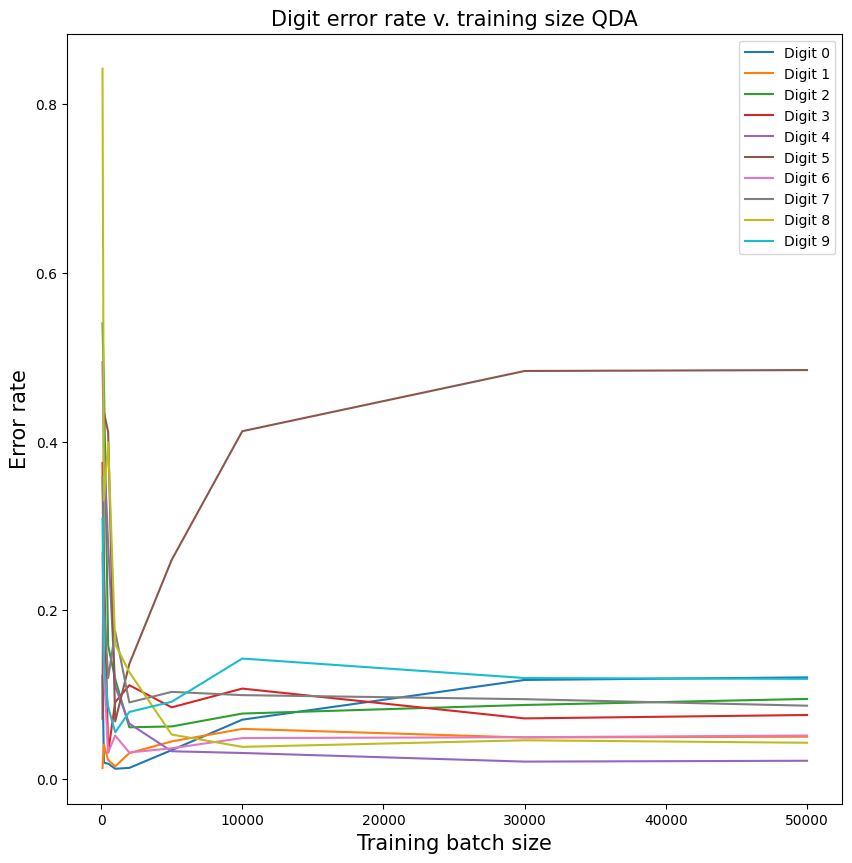

In [573]:
plt.figure(figsize=(10,10))
plt.plot(training_n, [qda_dig_errors[i][0] for i in range(len(qda_dig_errors))], label='Digit 0')
plt.plot(training_n, [qda_dig_errors[i][1] for i in range(len(qda_dig_errors))], label='Digit 1')
plt.plot(training_n, [qda_dig_errors[i][2] for i in range(len(qda_dig_errors))], label='Digit 2')
plt.plot(training_n, [qda_dig_errors[i][3] for i in range(len(qda_dig_errors))], label='Digit 3')
plt.plot(training_n, [qda_dig_errors[i][4] for i in range(len(qda_dig_errors))], label='Digit 4')
plt.plot(training_n, [qda_dig_errors[i][5] for i in range(len(qda_dig_errors))], label='Digit 5')
plt.plot(training_n, [qda_dig_errors[i][6] for i in range(len(qda_dig_errors))], label='Digit 6')
plt.plot(training_n, [qda_dig_errors[i][7] for i in range(len(qda_dig_errors))], label='Digit 7')
plt.plot(training_n, [qda_dig_errors[i][8] for i in range(len(qda_dig_errors))], label='Digit 8')
plt.plot(training_n, [qda_dig_errors[i][9] for i in range(len(qda_dig_errors))], label='Digit 9')
plt.title('Digit error rate v. training size QDA', fontsize=15)
plt.xlabel('Training batch size', fontsize=15)
plt.ylabel('Error rate', fontsize=15)
plt.legend()
# plt.savefig('Q8.3d_plot_QDA.png', dpi=300)

## 8.4

In [579]:
#Need to reshape the data to have the images be row vectors
test=mnist['test_data'].reshape(10000,784)

In [580]:
rlist=random.sample(range(0, len(m_train)), 200)
temp_train = m_train[rlist]
temp_labels = ml_train[rlist]

In [582]:
kaggle_preds = qda_model(temp_train, temp_labels, test)

In [585]:
df = pd.DataFrame({'Id': np.linspace(1,10000,10000,dtype=int), 'Category': kaggle_preds},dtype=np.int64)
df.to_csv('mnist_preds.csv',index=False)

## 8.5

In [588]:
spam = np.load('data/spam-data-hw3.npz')

In [589]:
spam.files[]

['training_data', 'training_labels', 'test_data']

In [590]:
import os

In [591]:
def get_freqs(path):
    
    files = os.listdir(path)
    word_freqs = {}

    for file in files:
        with open('{}/{}'.format(path,file), encoding='utf8', errors='ignore') as f:
            try:
                lines = f.readlines() # Read in text from file
            except Exception as e:
                    # skip files we have trouble reading.
                continue

        for i in range(len(lines)):
            words=lines[i].split()

            for word in words:
                if word not in word_freqs.keys():
                    word_freqs[word] = 1
                elif word in word_freqs.keys():
                    word_freqs[word] += 1
    
    word_freqs = sorted(word_freqs.items(), key=lambda x:x[1],reverse=True)
    return word_freqs

In [597]:
spam_freqs=get_freqs('data/spam')

In [598]:
ham_freqs=get_freqs('data/ham')

In [599]:
spam_words=[spam_freqs[:200][i][0] for i in range(200)]
spam_freqs=[spam_freqs[:200][i][1] for i in range(200)]

In [600]:
ham_words=[ham_freqs[:200][i][0] for i in range(200)]
ham_freqs=[ham_freqs[:200][i][1] for i in range(200)]

In [601]:
# add these all as features
additions=list(set(spam_words)^set(ham_words))

In [602]:
additions

['03',
 'now',
 'tr',
 'l',
 '02',
 'professional',
 'enron',
 'nbsp',
 'pills',
 '+',
 'd',
 'effective',
 'pt',
 'hou',
 '2004',
 'international',
 '04',
 '100',
 'mmbtu',
 'future',
 'subject',
 'u',
 'day',
 '20',
 'more',
 'change',
 'free',
 'today',
 '11',
 'statements',
 'software',
 'without',
 'over',
 'office',
 '>',
 'daily',
 'o',
 'texas',
 '69',
 'april',
 'products',
 'cc',
 'robert',
 'attached',
 '30',
 'j',
 'am',
 'call',
 'july',
 '25',
 'email',
 'sent',
 'nom',
 '|',
 '12',
 'mary',
 'sitara',
 'corp',
 'gary',
 'stock',
 'bob',
 'like',
 '08',
 'meter',
 'x',
 'following',
 'click',
 'looking',
 '28',
 '06',
 'million',
 'deal',
 'within',
 'center',
 'computron',
 'deals',
 'march',
 'width',
 'order',
 'file',
 'how',
 'r',
 'here',
 '95',
 '&',
 'save',
 'want',
 'td',
 'back',
 '63',
 'securities',
 'flow',
 'per',
 'farmer',
 'month',
 'melissa',
 'online',
 'business',
 '60',
 'know',
 'original',
 'houston',
 'height',
 'inc',
 'pm',
 ']',
 'daren',
 'inv

In [611]:
for word in additions:
    print('def freq_{}_feature(text, freq):\n    return float(freq[\'{}\'])'.format(word,word))

def freq_03_feature(text, freq):
    return float(freq['03'])
def freq_now_feature(text, freq):
    return float(freq['now'])
def freq_tr_feature(text, freq):
    return float(freq['tr'])
def freq_l_feature(text, freq):
    return float(freq['l'])
def freq_02_feature(text, freq):
    return float(freq['02'])
def freq_professional_feature(text, freq):
    return float(freq['professional'])
def freq_enron_feature(text, freq):
    return float(freq['enron'])
def freq_nbsp_feature(text, freq):
    return float(freq['nbsp'])
def freq_pills_feature(text, freq):
    return float(freq['pills'])
def freq_+_feature(text, freq):
    return float(freq['+'])
def freq_d_feature(text, freq):
    return float(freq['d'])
def freq_effective_feature(text, freq):
    return float(freq['effective'])
def freq_pt_feature(text, freq):
    return float(freq['pt'])
def freq_hou_feature(text, freq):
    return float(freq['hou'])
def freq_2004_feature(text, freq):
    return float(freq['2004'])
def freq_internati

In [612]:
for word in additions:
    print('feature.append(freq_{}_feature(text, freq))'.format(word))

feature.append(freq_03_feature(text, freq))
feature.append(freq_now_feature(text, freq))
feature.append(freq_tr_feature(text, freq))
feature.append(freq_l_feature(text, freq))
feature.append(freq_02_feature(text, freq))
feature.append(freq_professional_feature(text, freq))
feature.append(freq_enron_feature(text, freq))
feature.append(freq_nbsp_feature(text, freq))
feature.append(freq_pills_feature(text, freq))
feature.append(freq_+_feature(text, freq))
feature.append(freq_d_feature(text, freq))
feature.append(freq_effective_feature(text, freq))
feature.append(freq_pt_feature(text, freq))
feature.append(freq_hou_feature(text, freq))
feature.append(freq_2004_feature(text, freq))
feature.append(freq_international_feature(text, freq))
feature.append(freq_04_feature(text, freq))
feature.append(freq_100_feature(text, freq))
feature.append(freq_mmbtu_feature(text, freq))
feature.append(freq_future_feature(text, freq))
feature.append(freq_subject_feature(text, freq))
feature.append(freq_u_feat